# Linear Least Square Regression LOO Error

## Import neccessary libraries

In [7]:
import sys
import numpy as np
import matplotlib.pyplot as plt

## For each degree (1..27) get the polynomial coefficients of our data

In [8]:
if __name__ == '__main__':    
    #get the x and y from data file
    x = np.genfromtxt(fname="hw2.dat", usecols=0)
    y = np.genfromtxt(fname="hw2.dat", usecols=1)
    #keep track of coefficients
    coeff = []
    #get coefficients for each degree 1-27
    for degree in range(1,28):
        z = np.polyfit(x, y, degree)
        coeff.append(z)

## Get the LOO Error for each degree and print

In [18]:
    #keep track of all LOO errors    
    errors = []
    #for each degree get the LOO error
    for degree in range(0,27):
        #set our sum of errors to 0
        sum_error = 0
        #for each value in x
        for val in range(0, len(x)):
            temp_y = np.delete(y,val)
            temp_x = np.delete(x,val)
            y_pred = np.polyval(coeff[degree], temp_x)
            #get the mean squared error for everything in the data set except for the current data point and add that sum into our sum_error
            sum_error += (np.square(temp_y - y_pred)).mean(axis=None)
        #when exiting the loop take the sum of all errors and divide it by the length of x 
        sum_error = sum_error / len(x) 
        errors.append(sum_error)
        
    #Print the LOO error values
    for degree in range(0,27): 
        print("Degree ", degree+1 , "LOO Error: " , errors[degree])

Degree  1 LOO Error:  81428.96911796507
Degree  2 LOO Error:  80504.58987631398
Degree  3 LOO Error:  64602.27368203443
Degree  4 LOO Error:  63441.940865855875
Degree  5 LOO Error:  63417.14487401618
Degree  6 LOO Error:  63399.81627938437
Degree  7 LOO Error:  63147.21029013717
Degree  8 LOO Error:  62124.548269588224
Degree  9 LOO Error:  62044.80320761302
Degree  10 LOO Error:  61897.130756765975
Degree  11 LOO Error:  61855.500664395666
Degree  12 LOO Error:  61549.24058115465
Degree  13 LOO Error:  61175.580575811626
Degree  14 LOO Error:  60818.83311749504
Degree  15 LOO Error:  60700.03668340617
Degree  16 LOO Error:  60695.89907904846
Degree  17 LOO Error:  60695.84285271417
Degree  18 LOO Error:  60693.479558784624
Degree  19 LOO Error:  60200.188345185205
Degree  20 LOO Error:  59832.97775075839
Degree  21 LOO Error:  59782.84745841619
Degree  22 LOO Error:  59775.56960471178
Degree  23 LOO Error:  59769.54411071102
Degree  24 LOO Error:  59192.192985486974
Degree  25 LOO Er

## Plot all LOO Errors 

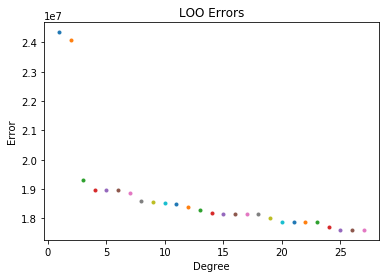

In [10]:
    #plot all our our LOO errors for each degree
    plt.title("LOO Errors")
    plt.xlabel("Degree")
    plt.ylabel("Error")
    for degree in range(0,27): 
        plt.plot(degree+1, errors[degree], '.')
    plt.show()   

## Plot the minimum error as our model

Lowest error degree:  27
Lowest error:  17604821.58415532


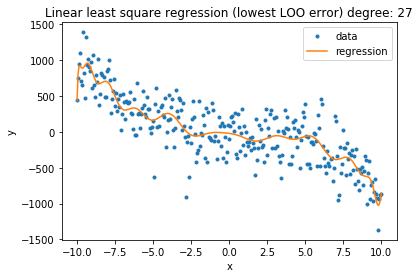

In [11]:
    lowest_error_degree_value = sys.float_info.max
    lowest_error_degree = 0
    
    for degree in range(0,27): 
        if (errors[degree] < lowest_error_degree_value):
            lowest_error_degree_value = errors[degree]
            lowest_error_degree = degree
    print("Lowest error degree: ", lowest_error_degree+1) 
    print("Lowest error: ", errors[lowest_error_degree])    
   
    plt.title("Linear least square regression (lowest LOO error) degree: " + str(lowest_error_degree+1))
    plt.xlabel("x")
    plt.ylabel("y")
    #plot original data
    plt.plot(x,y, '.', label='data')
    #plot the fit 
    plt.plot(x,np.polyval(coeff[lowest_error_degree],x), '-', label='regression')
    plt.legend();
    plt.show()                    